# TODO

* WIP! Why does randomness hurt the performance?
* WIP! Fluctuation and complexity; harmony!
* WIP! L.G. Khachian - ny times article about mathematics
* PLOTTING FEASIBLE REGIONS
* Connecting my algorithm to check the complexity of machine learning algorithms - BUILDING A TOOL FOR ML
* NOISY DATA means we can't reasonably get 100% accuracy anyways. We should instead aim for 99% to save on computational cost.

---

**Simplex Algorithm**

Originally devised by Dr. George Danzing after the second world war as a planning algorithm. The main idea around it is to find the "best" feasible solution (_objective function_) for a given objective. To find the best solution, a number of ground rules are applied (_constraints_).

This implementation maximizes a given objective functions value (Z) that is constrained by a number of inequality constraints. The algorithm takes input in form of lists.
* A - objective function e.g. ``A = [40, 30]``, which would be written as Z = 40x_1 + 30x_2
* b - a list constraints e.g. ``b = [[1, 1], [2, 1]]``
* c - a list of inequality constrains values e.g. ``c = [12, 16]``, giving us constraints x_1 + x_2 >= 12 and 2x_1 + x_2 >= 16

We also assume that each x_1 through x_n is positive (>= 0)

---

The code for Simplex Algorithm is in the simplex.py file

In [1]:
# Imports
import copy
import matplotlib.pyplot as plt

%pip install imageio

# Importing the supportive functions from additional files
from Utilities.input_gen_utils import *  # Input generation
from Utilities.format_utils import *     # Formatting values for prettier printing

# The implementation of Simplex algrithm with counts.
from simplex_with_counts import *
from simplex import simplex

# Mainly used for visualizing input distributions as a pixel matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Example usage:
l = 4  # Number of constraints
k = 3  # Number of variables
A, b, c = generate_random_simplex_input(4, 4)

# Now, you can call your simplex function with these generated inputs
# print("Generated Inputs:")
print_example(A, b, c, 'random')
print(f'Running simplex now!\n* ---------- *')
solution = simplex(A, b, c, print_steps=False, plot_for_gif=False)

Example for random input:
A=[67, 6, 36, 54], b=[[28, 67, 80, 82], [89, 78, 55, 82], [6, 94, 57, 8], [47, 16, 82, 55]], c=[32, 42, 80, 83]

Our goal is to maximize the objective function given by:
-67x_1 + -6x_2 + -36x_3 + -54x_4 + Z = 0
Which is subject to the following constraints/inequalities:
IC 1: 28x_1 + 67x_2 + 80x_3 + 82x_4 <= 32
IC 2: 89x_1 + 78x_2 + 55x_3 + 82x_4 <= 42
IC 3: 6x_1 + 94x_2 + 57x_3 + 8x_4 <= 80
IC 4: 47x_1 + 16x_2 + 82x_3 + 55x_4 <= 83
---

Running simplex now!
* ---------- *
Solution found!
 x_0    x_1     x_2    x_3   y_0    y_1   y_2   y_3    Z      c   
  0.00   42.46  62.70  56.20  1.00  -0.31  0.00  0.00  0.00  18.79
  1.00    0.88   0.62   0.92  0.00   0.01  0.00  0.00  0.00   0.47
  0.00   88.74  53.29   2.47  0.00  -0.07  1.00  0.00  0.00  77.17
  0.00  -25.19  52.96  11.70  0.00  -0.53  0.00  1.00  0.00  60.82
------------------------------------------------------------------
  0.00   52.72   5.40   7.73  0.00   0.75  0.00  0.00  1.00  31.62
None


# Experiment 1

This experiment plots out graphs of operations for different types of inputs. This implementation of the experiment allows to more easily add different types of inputs, as well as change the minimum/maximum values for integers to use in constraints.

In [7]:
# Input generation mappings - it's possible to add more or comment some out if needed.
input_generation_functions = {
    'symmetric': generate_symmetric_simplex_input,
    'random': generate_random_simplex_input,
    # 'geometric': generate_geometric_simplex_input,
    'geometric_varied': generate_varied_geometric_simplex_input,
    # 'linear': generate_linear_simplex_input,
    'linear_varied': generate_varied_linear_simplex_input,
    'prime': generate_input_with_only_primes,
    'gaussian': generate_gaussian_simplex_input,
    'pseudoprimes': generate_pseudoprime_simplex_input,
    'sparse_random_30': generate_random_simplex_input,
    'sparse_random_70': generate_random_simplex_input,
    'sparse_random': generate_random_simplex_input,
    'top_zero': generate_random_simplex_input
}

# Initialize dictionary for average operations
avg_operations = {input_type: [] for input_type in input_generation_functions.keys()}
num_constraints = []

# Main experiment data 
constraints_n, variables_n = 10, 10   # Initial values
max_iterations = 21
number_of_runs_for_iteration = 2000 # <- 2000 means less than 1% deviation from the average of 100K runs.
min_value = 1
max_value = 1000000
step = 1
sparsity_rate = 0.5  # In addtion to the sparse_30 and sparse_70 runs

# Text variables for recognizing the saved file. Set as "" to not use them.
file_prefix = 'THESIS_EXP_1'
file_suffix = 'RERUN'


# Pregenerating primes and pseudoprimes to minimize computational strain.
max_list_len = 10000  # Define the maximum length of the primes_array
primes = generate_primes_in_range(min_value, max_value)
small_primes = limit_list_size(primes, max_list_len)
pseudoprimes = generate_pseudoprimes_in_range(min_value, max_value)
small_pseudoprimes = limit_list_size(pseudoprimes, max_list_len)
print(f'Only using {len(small_primes)}/{len(primes)} primes')
print(f'and {len(small_pseudoprimes)}/{len(pseudoprimes)} pseudoprimes for input generation due to computational constraints.')


# ---
for iteration in range(max_iterations):
    for input_type, gen_func in input_generation_functions.items():
        counts_total = {'comparisons': 0, 'assignments': 0, 'arithmetic': 0, 'accesses': 0, 'func_calls': 0}
        
        iter_count = 1
        for _ in range(number_of_runs_for_iteration):
            try:
                if input_type == 'prime':
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value, primes=small_primes)
                elif input_type == 'pseudoprimes':
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value, pseudoprimes=small_pseudoprimes)
                elif input_type == 'sparse_random':
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value)
                    b, c = make_sparse_simplex_input(b, c, sparsity=sparsity_rate)
                elif input_type == 'sparse_random_30':
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value)
                    b, c = make_sparse_simplex_input(b, c, sparsity=0.3)
                elif input_type == 'sparse_random_70':
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value)
                    b, c = make_sparse_simplex_input(b, c, sparsity=0.7)
                elif input_type == 'top_zero':
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value)
                    b = make_diagonal_zeros(b, 'top')                    
                else:
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value)
                _, counts = simplex_w_counts(A, b, c, func='max', matrix='dense')  # Should be always 'dense' to not make optimizations.
                
                for key in counts.keys():
                    counts_total[key] += counts[key]
            except Exception as e:
                # print(f"{input_type} input generation or processing failed: {e}")
                pass
            if iter_count % 5 == 0:
                # print(f'{iteration+1}/{max_iterations} - vars: {variables_n}, cnst: {constraints_n}; iter_count={iter_count}/{number_of_runs_for_iteration}')
                pass
            iter_count += 1
        
        # Correctly update the average operations for this input type
        # Calculate average for each operation type
        avg_operations_per_type = {key: total / number_of_runs_for_iteration for key, total in counts_total.items()}
        # Calculate the overall average for this input type and iteration
        avg_operations[input_type].append(np.mean(list(avg_operations_per_type.values())))

    num_constraints.append(constraints_n)
    print(f'Completed iteration {iteration+1}/{max_iterations} - vars: {variables_n}, cnst: {constraints_n}')  # Some basic logging to keep track of the experiment
    constraints_n += step
    variables_n += step


# Additional function for saving the results to a file for better analysis
save_results(
    constraints_n-max_iterations,
    variables_n-max_iterations,
    max_iterations,
    number_of_runs_for_iteration,
    min_value,
    max_value,
    avg_operations,
    file_prefix=file_prefix,
    file_suffix=file_suffix
    )


# Plotting
plt.figure(figsize=(12, 8))
for input_type in avg_operations:
    plt.plot(num_constraints, avg_operations[input_type], label=f'{input_type} input')

plt.xlabel('Number of Inequalities')
plt.ylabel('Average Number of Operations')
plt.title('Simplex Algorithm Performance Across Different Input Distributions')
plt.legend()
plt.grid(True)
plt.xticks(range(min(num_constraints), max(num_constraints) + 1, 2))  # Only use actual datapoints
plt.show()


Only using 10000/78498 primes
and 1000/1000 pseudoprimes for input generation due to computational constraints.
Completed iteration 1/21 - vars: 10, cnst: 10
Completed iteration 2/21 - vars: 11, cnst: 11
Completed iteration 3/21 - vars: 12, cnst: 12
Completed iteration 4/21 - vars: 13, cnst: 13
Completed iteration 5/21 - vars: 14, cnst: 14
Completed iteration 6/21 - vars: 15, cnst: 15


KeyboardInterrupt: 

# Experiment 2 - Effects of Optimizing the Simplex Method

This experiment explores a common optimization technique of the Simplex Method, which enables the pivoting mechanism to bypass zero elements to reduce the number of operations needed to reach a solution for sparse matrixes. The number of operations required to reach a solution for a standard Simplex Method (SM) implementation is then compared against the Zero-Exploiting Simplex Method (ZESM).

To validate the optimal value calculated by ZESM, outputs from both SM and ZESM are compared for each input to be sure, that optimization does not compromise the correctness.

In [122]:
# Function mappings
input_generation_functions = {
    'random': generate_random_simplex_input,
    'sparse_random': generate_random_simplex_input,
    'top_zero': generate_random_simplex_input,
    'random_exploit': generate_random_simplex_input,
    'sparse_random_exploit': generate_random_simplex_input,
    'top_zero_exploit': generate_random_simplex_input
}

# Initialize dictionary for average operations
avg_operations = {input_type: [] for input_type in input_generation_functions.keys()}
num_constraints = []

# Main experiment parameters
constraints_n, variables_n = 100, 100   # Initial values
max_iterations = 19
number_of_runs_for_iteration = 30  # <- 2000 means less than 1% deviation from the average of 100K runs.
min_value = 1
max_value = 1000000
step = 50
sparsity_rate = 0.5  # Sparsity of the random one

# Text parameters for the file name so it's easier to find
file_prefix = 'THESIS_EXPERIMENT_2'
file_suffix = '_LARGE_SPARSITY_EXPLOIT'  # Additional parameter to save the output file


# ---
counter = 1  # Used for indicating experiments progress.
for iteration in range(max_iterations):
    for input_type, gen_func in input_generation_functions.items():
        counts_total = {'comparisons': 0, 'assignments': 0, 'arithmetic': 0, 'accesses': 0, 'func_calls': 0}
        
        for _ in range(number_of_runs_for_iteration):
            try:
                if input_type == 'sparse_random' or input_type == 'sparse_random_exploit':
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value)
                    b, c = make_sparse_simplex_input(b, c, sparsity=sparsity_rate)
                elif input_type == 'top_zero' or input_type == 'top_zero_exploit':
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value)
                    b = make_diagonal_zeros(b, True)                        
                else:
                    A, b, c = gen_func(constraints_n, variables_n, min_value, max_value)
                if input_type.endswith('_exploit'):
                    _, counts = simplex_w_counts(A, b, c, func='max', matrix='sparse')
                else:
                    _, counts = simplex_w_counts(A, b, c, func='max', matrix='dense')
            
            
                for key in counts.keys():
                    counts_total[key] += counts[key]
            except Exception as e:
                #print(f"{input_type} input generation or processing failed: {e}")
                pass
        
        # Correctly update the average operations for this input type
        # Calculate average for each operation type
        avg_operations_per_type = {key: total / number_of_runs_for_iteration for key, total in counts_total.items()}
        # Calculate the overall average for this input type and iteration
        avg_operations[input_type].append(np.mean(list(avg_operations_per_type.values())))

    num_constraints.append(constraints_n)
    constraints_n += step
    variables_n += step
    print(f'Completed iteration {counter}/{max_iterations}')
    counter += 1

save_results(constraints_n, variables_n, max_iterations, number_of_runs_for_iteration, min_value, max_value, avg_operations, file_prefix, file_suffix)

# Plotting
plt.figure(figsize=(12, 8))
for input_type in avg_operations:
    plt.plot(num_constraints, avg_operations[input_type], label=f'{input_type} Inputs')

plt.xlabel('Number of Inequalities')
plt.ylabel('Average Number of Operations')
plt.title('Simplex Method Performance Across Input Types')
plt.legend()
plt.grid(True)

plt.xticks(range(min(num_constraints), max(num_constraints) + 1, 2))  # Only use actual datapoints

plt.show()

Completed iteration 1/19
Completed iteration 2/19
Completed iteration 3/19
Completed iteration 4/19
Completed iteration 5/19
Completed iteration 6/19
Completed iteration 7/19
Completed iteration 8/19
Completed iteration 9/19
Completed iteration 10/19
Completed iteration 11/19
Completed iteration 12/19
Completed iteration 13/19


# Experiment 3

This experiment takes the "best" input (top-zero) and runs the algorithm on it twice: once for the input as-is and the second time for the shuffled input (changing the order of constraints). Additional tests for shuffling columns (variables) and both rows and columsn are done as well.

By doing so, we hope to show that if altering the order of constraints or variables improves the performance, then there is possibility for preprocessing to still have a reasonable effect on improving the performance of the Simplex algorithm.

**Verdict**

This does not seem to have an effect on the performance, as the graphs are almost exactly the same. No matter the type of inputs. So really it's more about data distribution, than the actual values themselves.

Completed iteration 1/18
Completed iteration 2/18
Completed iteration 3/18
Completed iteration 4/18
Completed iteration 5/18
Completed iteration 6/18
Completed iteration 7/18
Completed iteration 8/18
Completed iteration 9/18
Completed iteration 10/18
Completed iteration 11/18
Completed iteration 12/18
Completed iteration 13/18
Completed iteration 14/18
Completed iteration 15/18
Completed iteration 16/18
Completed iteration 17/18
Completed iteration 18/18
Data saved to /Users/mihkeluutar/UniTartu/Thesis/helper/results/THESIS_EXPERIMENT_2_1000_18_v1000_18_i18_r30_min1_max1000000__LARGE_SPARSITY_EXPLOIT.txt


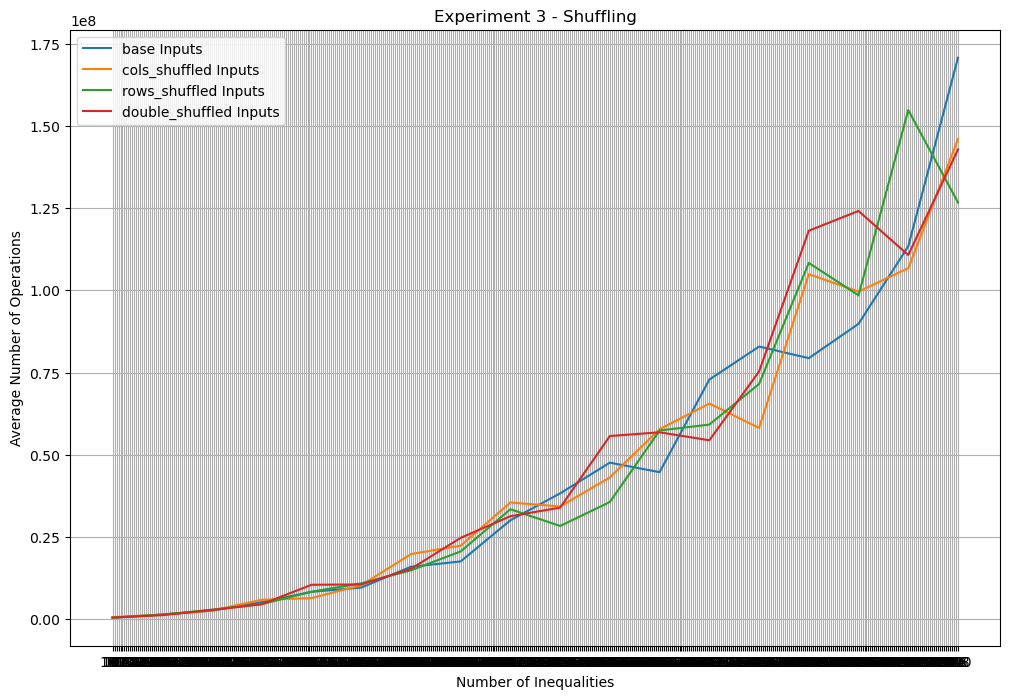

In [121]:
# Experiment 3 - code to run the experiments.

# Function mappings
input_generation_functions = {
    'base': generate_random_simplex_input,
    'cols_shuffled': generate_random_simplex_input,
    'rows_shuffled': generate_random_simplex_input,
    'double_shuffled': generate_random_simplex_input,
}

# Initialize dictionary for average operations
avg_operations = {input_type: [] for input_type in input_generation_functions.keys()}
num_constraints = []

# Main experiment parameters
# Step 50, const 100 and max_iter 18 for 100-1000 inequalities.
constraints_n, variables_n = 100, 100   # Initial values
max_iterations = 18
number_of_runs_for_iteration = 30  # <- 2000 means less than 1% deviation from the average of 100K runs.
min_value = 1
max_value = 1000000
step = 50
sparsity_rate = 0.5  # Sparsity of the random one

# Text parameters for the file name so it's easier to find
file_prefix = 'THESIS_EXPERIMENT_3'
file_suffix = '_LARGE_SPARSITY_EXPLOIT'  # Additional parameter to save the output file


# ---
counter = 1  # Used for indicating experiments progress.
for iteration in range(max_iterations):
    for input_type, gen_func in input_generation_functions.items():
        counts_total = {'comparisons': 0, 'assignments': 0, 'arithmetic': 0, 'accesses': 0, 'func_calls': 0}
        
        for _ in range(number_of_runs_for_iteration):
            try:
                A, b, c = gen_func(constraints_n, variables_n, min_value, max_value)
                b = make_diagonal_zeros(b, True)
                if input_type == 'base':
                    pass
                elif input_type == 'cols_shuffled':
                    A, b = shuffle_simplex_inputs_columns(A, b)      
                elif input_type == 'rows_shuffled':
                    b, c = shuffle_simplex_inputs_rows(b, c)                
                else:
                    A, b = shuffle_simplex_inputs_columns(A, b)
                    b, c = shuffle_simplex_inputs_rows(b, c)     
                
                _, counts = simplex_w_counts(A, b, c, func='max', matrix='dense')
            
                for key in counts.keys():
                    counts_total[key] += counts[key]
            except Exception as e:
                #print(f"{input_type} input generation or processing failed: {e}")
                pass
        
        # Correctly update the average operations for this input type
        # Calculate average for each operation type
        avg_operations_per_type = {key: total / number_of_runs_for_iteration for key, total in counts_total.items()}
        # Calculate the overall average for this input type and iteration
        avg_operations[input_type].append(np.mean(list(avg_operations_per_type.values())))

    num_constraints.append(constraints_n)
    constraints_n += step
    variables_n += step
    print(f'Completed iteration {counter}/{max_iterations}')
    counter += 1

save_results(constraints_n, variables_n, max_iterations, number_of_runs_for_iteration, min_value, max_value, avg_operations, file_prefix, file_suffix)

# Plotting
plt.figure(figsize=(12, 8))
for input_type in avg_operations:
    plt.plot(num_constraints, avg_operations[input_type], label=f'{input_type} Inputs')

plt.xlabel('Number of Inequalities')
plt.ylabel('Average Number of Operations')
plt.title('Experiment 3 - Shuffling')
plt.legend()
plt.grid(True)

plt.xticks(range(min(num_constraints), max(num_constraints) + 1, 2))  # Only use actual datapoints

plt.show()

# Shuffling Visualization

Below is a simple Python code snippet used to display how shuffling an input would work. An example of a sparse matrix is provided below

/var/folders/3x/zbbhfv350l7g455kz77dzgzh0000gn/T/ipykernel_1308/3690734483.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=-(size*3.2))


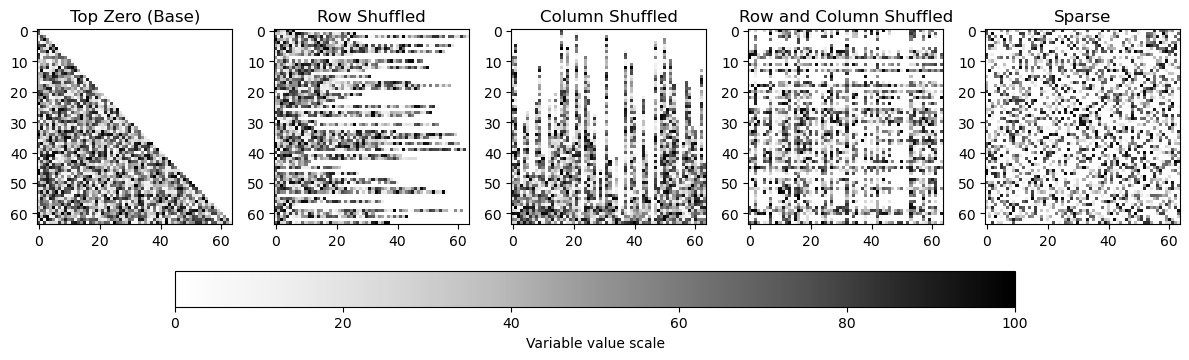

In [ ]:
# Basic configuration for images
min_value = 1
max_value = 100
size = 64  # This assumes both 'inequalities' and 'variables' should be set to 'size' for a square image
sparsity_rate = 0.5  # Example sparsity rate to roughly match sparsity of top-zero input (top-diagonal is all zeros)

# Different Functions and their generation methods; comment out any that are not needed
input_generation_functions = {
    'Top Zero (Base)': generate_random_simplex_input,
    'Row Shuffled': generate_random_simplex_input,
    'Column Shuffled': generate_random_simplex_input,
    'Row and Column Shuffled': generate_random_simplex_input,
    'Sparse': generate_random_simplex_input  # Used as a reference
}

# Setup the plot for 5 images in a row
fig, axes = plt.subplots(1, 5, figsize=(12, 18))
axes = axes.flatten()

# Normalize the color scale for 0 to be white and 100 to be black
norm = Normalize(vmin=0, vmax=max_value)

# Base input generation
A_base, b_base, c_base = generate_random_simplex_input(size, size, min_value, max_value)
b_base_dia = copy.deepcopy(b_base)
b_base_dia = make_diagonal_zeros(b_base_dia)

# Displaying each image
for ax, (label, gen_func) in zip(axes, input_generation_functions.items()):
    try:
        A, b, c = copy.deepcopy(A_base), copy.deepcopy(b_base_dia), copy.deepcopy(c_base)
        
        if label == 'Row Shuffled':
            b, c = shuffle_simplex_inputs_rows(b, c)
        elif label == 'Column Shuffled':
            A, b = shuffle_simplex_inputs_columns(A, b)
        elif label == 'Row and Column Shuffled':
            A, b = shuffle_simplex_inputs_columns(A, b)
            b, c = shuffle_simplex_inputs_rows(b, c)
        elif label == 'Sparse':
            A, b, c = A_base, b_base, c_base
            b, c = make_sparse_simplex_input(b, c, 0.5)        

        # Display the data
        im = ax.imshow(b, cmap='Greys', norm=norm)
        ax.set_title(label)
    except Exception as e:  # Should nto happen, but still...
        print(f"Error with {label}: {e}")
        ax.imshow(np.zeros((size, size)), cmap='Greys')  # Show an empty grid on error

# This has a lot of manual tinkering, so if changing the size of images, check this as well.
plt.subplots_adjust()  # Adjust the height spacing
cbar_ax = fig.add_axes([0.15, 0.40, 0.7, 0.02])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Variable value scale')

plt.tight_layout(h_pad=-(size*3.2))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Laoding data
with open('helper/results/EXP-E_STEP1000_1000-9_v1000-9_i9_r2_min1_max1000000_SPARSITY_TEST_GEO.txt', 'r') as file:
    data = json.load(file)

# Calculating decreases
percent_decreases = {}
categories = ['geometric', 'sparse_random', 'top_zero']  # <- Hardcoded values
for category in categories:
    original_values = data[category]
    exploit_values = data[f'{category}_exploit']
    decreases = [
        "{:.2f}".format((1 - (exploit / original)) * 100)
        for original, exploit in zip(original_values, exploit_values)
    ]
    percent_decreases[category] = decreases

# Step 3: Creating the table
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figure size as needed
ax.axis('tight')
ax.axis('off')

# DATA ! 
table_data = [percent_decreases[category] for category in categories]
columns = [f'{i*100}' for i in range(1, 11)]

# Creating the table and plotting
the_table = ax.table(cellText=table_data,
                     rowLabels=categories,
                     colLabels=columns,
                     cellLoc='center',
                     loc='center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(8)
the_table.scale(1.2, 1.2)  # Adjust table size

plt.title('Percentage Decrease of Operations in OSM compared to SM')

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'helper/results/EXP-E_STEP1000_1000-9_v1000-9_i9_r2_min1_max1000000_SPARSITY_TEST_GEO.txt'

---

# Experiment E+

#### Objective

The primary objective of this experiment is to investigate computational advantages of exploiting sparsity within the Simplex Method. This is done by modifying the method of finding pivot elements to skip over those which are 0.

---

#### Mechanisms

The experiment compares the number of operations of the basic Simplex Method (SM) and Optimized Simplex Method (OSM) for the same input. Both implementations of the simplex method are the same, only differing on how the pivot element is chosen.

Each "size" of the input is ran for 2000 times to get an avarage count of operations. This variable can be changed. After each cycle of 2000 iterations, the number of inequalities and variables in input is increased by one.

#### Variables and setup

Before each run of the experiment, some key variables must be set

1. ``initial_variable_no`` - allows to specify the initial number of variables in each constraint
2. ``initial_const_no`` - allows to specify the initial number of constraints
3. ``number_of_runs_for_iterations`` - number of runs performed to get an average operations count
4. ``max_iterations`` - how many times should the experiment be repeated with increasing number of variables and constraints 
5. ``file_suffix`` - a string variable to specify an additional identifier to the file in which the results are saved.

#### Procedure

1. Variables for test are specified
2. For ``number_of_iterations`` times:
    1. Generate random input for the Simplex Method
    2. Modify the input so the values above the main diagonal are zeros
    3. Run both basic SM and OSM with the same input
    4. Compare results for the optimal value and raise an error if they differ
3. Save the average number of operations for SM and OSM into a variable
4. Plot the results

#### Analysis

TODO

---


Completed iteration 1/20
Completed iteration 2/20
Completed iteration 3/20
Completed iteration 4/20
Completed iteration 5/20
Completed iteration 6/20
Completed iteration 7/20
Completed iteration 8/20
Completed iteration 9/20
Completed iteration 10/20
Completed iteration 11/20
Completed iteration 12/20
Completed iteration 13/20
Completed iteration 14/20
Completed iteration 15/20
Completed iteration 16/20
Completed iteration 17/20
Completed iteration 18/20
Completed iteration 19/20
Completed iteration 20/20


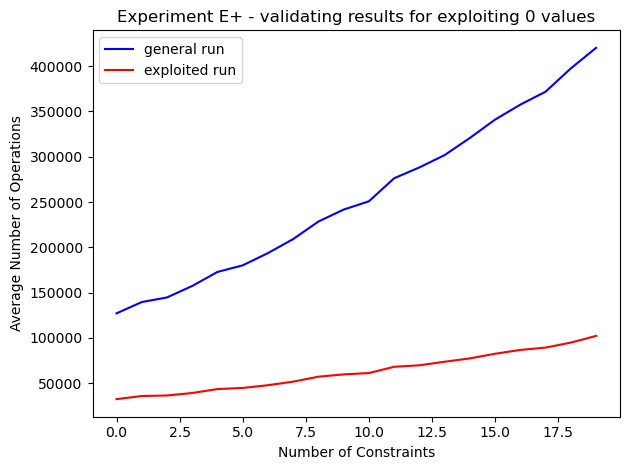

In [ ]:
# ---
# Experiment E+ Validating results for the simplex method pivoting functions.
# ---

# Experiment parameters
initial_var_no = 30  # how many variables should the smallest input have?
initial_const_no = 30  # how many constraints?
number_of_runs_for_iteration = 2000
max_iterations = 20

prefix = 'EXP-E'
file_suffix = '_EXPLOIT_VS_REGULAR'

# Plotting lists
avg_run_ops = []
avg_exploit_run_ops = []
num_constraints = []

constraints = initial_const_no
variables = initial_var_no

for iteration in range(max_iterations):
    total = 0
    total_exploit = 0

    # For testing, you can comment out/in any of the generations or add entirely another one.
    for _ in range(number_of_runs_for_iteration):
        try:
            # A, b, c = generate_linear_simplex_input(constraints, variables)
            A, b, c = generate_random_simplex_input(constraints, variables, 1, 1000000)
            b = make_diagonal_zeros(b, above_diagonal=True)
            A_copy, b_copy, c_copy = copy.deepcopy(A), copy.deepcopy(b), copy.deepcopy(c)

            # Initial run
            val_1, run_counts = simplex_w_counts(A, b, c, func='max', matrix='dense')
            total += sum(run_counts.values())

            # Exploited input run
            val_2, exploit_run_counts = simplex_w_counts(A_copy, b_copy, c_copy, func='max', matrix='sparse')
            total_exploit += sum(exploit_run_counts.values())

            # Quick check to validate that the output is same after shuffling. 
            if (val_1[-1][-1] != val_2[-1][-1]):
                # pass
                print(f'Difference in outputs: val_1={val_1[-1][-1]}, val_2={val_2[-1][-1]}')  

        except ZeroDivisionError:
            print(f'Failed for constraints={constraints} and variables={variables} due to division by zero.')

    print(f'Completed iteration {iteration + 1}/{max_iterations}')

    avg_run_ops.append(total / number_of_runs_for_iteration)
    avg_exploit_run_ops.append(total_exploit / number_of_runs_for_iteration)
    num_constraints.append(constraints)

    constraints += 1
    variables += 1

# Plotting as a line graph
x = np.arange(len(num_constraints))  # the label locations

# Line graph
fig, ax = plt.subplots()
line1 = ax.plot(x, avg_run_ops, color='blue', label='general run')
line2 = ax.plot(x, avg_exploit_run_ops, color='red', label='exploited run')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Constraints')
ax.set_ylabel('Average Number of Operations')
ax.set_title('Experiment E+ - validating results for exploiting 0 values')
ax.legend()
fig.tight_layout()

plt.show()


# Realisation X

For some reason geometric input takes less operations with runs starting from 17 variables and onwards. Why is it so? It is because of the max_length constrint. The number of operations needed is reduced dramatically if we have a number of equations that are the same (1000x_1 + 1000x_2...). However, it is worth exploring that if we have a 100 of the same equations vs one something that removes duplicates (exp. D) do we get a lower number of simplex operations, or is it something, that happens anyways?

In [ ]:
A, b, c = generate_geometric_simplex_input(8, 8, 1, 1000)
A_1, b_1, c_1 = generate_geometric_simplex_input(13, 13, 1, 1000)

print_example(A, b, c, 'geo 10x10')
print_example(A_1, b_1, c_1, 'geo 13x13')

Example for geo 10x10 input:
A=[1, 2, 4, 8, 16, 32, 64, 128], b=[[1, 2, 4, 8, 16, 32, 64, 128], [2, 4, 8, 16, 32, 64, 128, 256], [4, 8, 16, 32, 64, 128, 256, 512], [8, 16, 32, 64, 128, 256, 512, 1000], [16, 32, 64, 128, 256, 512, 1000, 1000], [32, 64, 128, 256, 512, 1000, 1000, 1000], [64, 128, 256, 512, 1000, 1000, 1000, 1000], [128, 256, 512, 1000, 1000, 1000, 1000, 1000]], c=[1, 3, 7, 15, 31, 63, 127, 255]
Our goal is to maximize the objective function given by:
-1x_1 + -2x_2 + -4x_3 + -8x_4 + -16x_5 + -32x_6 + -64x_7 + -128x_8 + Z = 0
Which is subject to the following constraints/inequalities:
Constraint 1: 1x_1 + 2x_2 + 4x_3 + 8x_4 + 16x_5 + 32x_6 + 64x_7 + 128x_8 <= 1
Constraint 2: 2x_1 + 4x_2 + 8x_3 + 16x_4 + 32x_5 + 64x_6 + 128x_7 + 256x_8 <= 3
Constraint 3: 4x_1 + 8x_2 + 16x_3 + 32x_4 + 64x_5 + 128x_6 + 256x_7 + 512x_8 <= 7
Constraint 4: 8x_1 + 16x_2 + 32x_3 + 64x_4 + 128x_5 + 256x_6 + 512x_7 + 1000x_8 <= 15
Constraint 5: 16x_1 + 32x_2 + 64x_3 + 128x_4 + 256x_5 + 512x_6 + 1000

# Experiment D - removing redundant inequalities

This experiment focuses on removing reduncant inequalities by attempting to remove those that have variables that are multiples of others.
In essence:

3x_1 + 6x_2 >= 18 is the same as
1x_1 + 2x_2 >= 6

So it makes sense to remove the latter.

---
TODO: some results don't match - look into it!

Completed iteration 1/20
Completed iteration 2/20
Completed iteration 3/20
Completed iteration 4/20
Completed iteration 5/20
Completed iteration 6/20
Completed iteration 7/20
Completed iteration 8/20
Completed iteration 9/20
Completed iteration 10/20
Completed iteration 11/20
Completed iteration 12/20
Completed iteration 13/20
Completed iteration 14/20
Completed iteration 15/20
Completed iteration 16/20
Completed iteration 17/20
Completed iteration 18/20
Completed iteration 19/20
Completed iteration 20/20


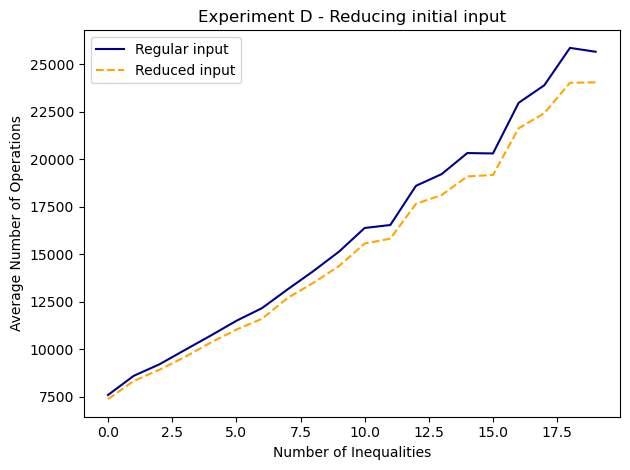

In [ ]:
# ---
# Experiment D
# ---

# Experiment parameters
initial_var_no = 2  # how many variables should the smallest input have?
initial_inequalities_no = 20  # how many constraints?
number_of_runs_for_iteration = 300
max_iterations = 20

# Plotting lists
avg_regular_input_run_ops = []
avg_reduced_input_run_ops = []
num_of_inequalities = []

inequalities = initial_inequalities_no
variables = initial_var_no

for iteration in range(max_iterations):
    total_regular = 0
    total_reduced = 0

    for _ in range(number_of_runs_for_iteration):
        try:
            A, b, c = generate_random_simplex_input(inequalities, variables, 1, 10)
            A_copy, b_copy, c_copy = copy.deepcopy(A), copy.deepcopy(b), copy.deepcopy(c)

            # Initial run
            result_regular, run_counts = simplex_w_counts(A_copy, b_copy, c_copy)
            total_regular += sum(run_counts.values())

            # Shuffled input run
            b_reduced, c_reduced = remove_redundant_constraints(copy.deepcopy(b), copy.deepcopy(c))
            result_reduced, reduced_run_counts = simplex_w_counts(A_copy, b_reduced, c_reduced)
            total_reduced += sum(reduced_run_counts.values())

            # We should also check that both results match, so we don't actually lose anything important.
            if (result_regular[-1][-1] != result_reduced[-1][-1]):
                print(f"Values don't match! [inequalities={inequalities}, variables={variables}]")
                print(f'Regular:  b={b}, c={c}')

        except ZeroDivisionError:
            print(f'Failed for constraints={inequalities} and variables={variables} due to division by zero.')

    print(f'Completed iteration {iteration + 1}/{max_iterations}')

    avg_regular_input_run_ops.append(total_regular / number_of_runs_for_iteration)
    avg_reduced_input_run_ops.append(total_reduced / number_of_runs_for_iteration)
    num_of_inequalities.append(inequalities)

    inequalities += 1

# Plotting as a line graph
x = np.arange(len(num_of_inequalities))  # the label locations

# Line graph
fig, ax = plt.subplots()
line1 = ax.plot(x, avg_regular_input_run_ops, color='darkblue', label='Regular input')
line2 = ax.plot(x, avg_reduced_input_run_ops, color='orange', linestyle='dashed', label='Reduced input')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Inequalities')
ax.set_ylabel('Average Number of Operations')
ax.set_title('Experiment D - Reducing initial input')
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
# HELPER FUNCTION
# Attempts to remove redundant constraint from the problem before starting to solve it
def remove_redundant_constraints(b, c):
    non_redundant_indices = []
    b_reduced = []
    c_reduced = []
    b_np = np.array(b)
    c_np = np.array(c)

    # Identifying non-redundant constraints
    for i in range(len(b)):
        is_redundant = False
        for j in range(i + 1, len(b)):
            with np.errstate(divide='ignore', invalid='ignore'):
                ratio_b = np.divide(b_np[i], b_np[j])
                ratio_c = c_np[i] / c_np[j] if c_np[j] != 0 else np.inf
                # Check if the constraint vectors are scalar multiples and if their 'c' values are consistent
                if not np.any(np.isnan(ratio_b)) and np.allclose(ratio_b, ratio_b[0]) and np.isclose(ratio_c, ratio_b[0]):
                    is_redundant = True
                    break
        if not is_redundant:
            non_redundant_indices.append(i)

    # Rebuild b and c using identified non-redundant indices
    for index in non_redundant_indices:
        b_reduced.append(b[index])
        c_reduced.append(c[index])

    return b_reduced, c_reduced

# Test the function with your provided values
initial_A = [2, 5]
initial_b = [[6, 1], [3, 2], [6, 4], [1, 8]]
initial_c = [7, 13, 26, 8]

reduced_b, reduced_c = remove_redundant_constraints(initial_b, initial_c)

print(f'Initial:\nb={initial_b}\nc={initial_c}')
print(f'Reduced:\nb={reduced_b}\nc={reduced_c}')


Initial:
b=[[6, 1], [3, 2], [6, 4], [1, 8]]
c=[7, 13, 26, 8]
Reduced:
b=[[6, 1], [6, 4], [1, 8]]
c=[7, 26, 8]


/var/folders/3x/zbbhfv350l7g455kz77dzgzh0000gn/T/ipykernel_87639/1943934020.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=-(size*2.6))


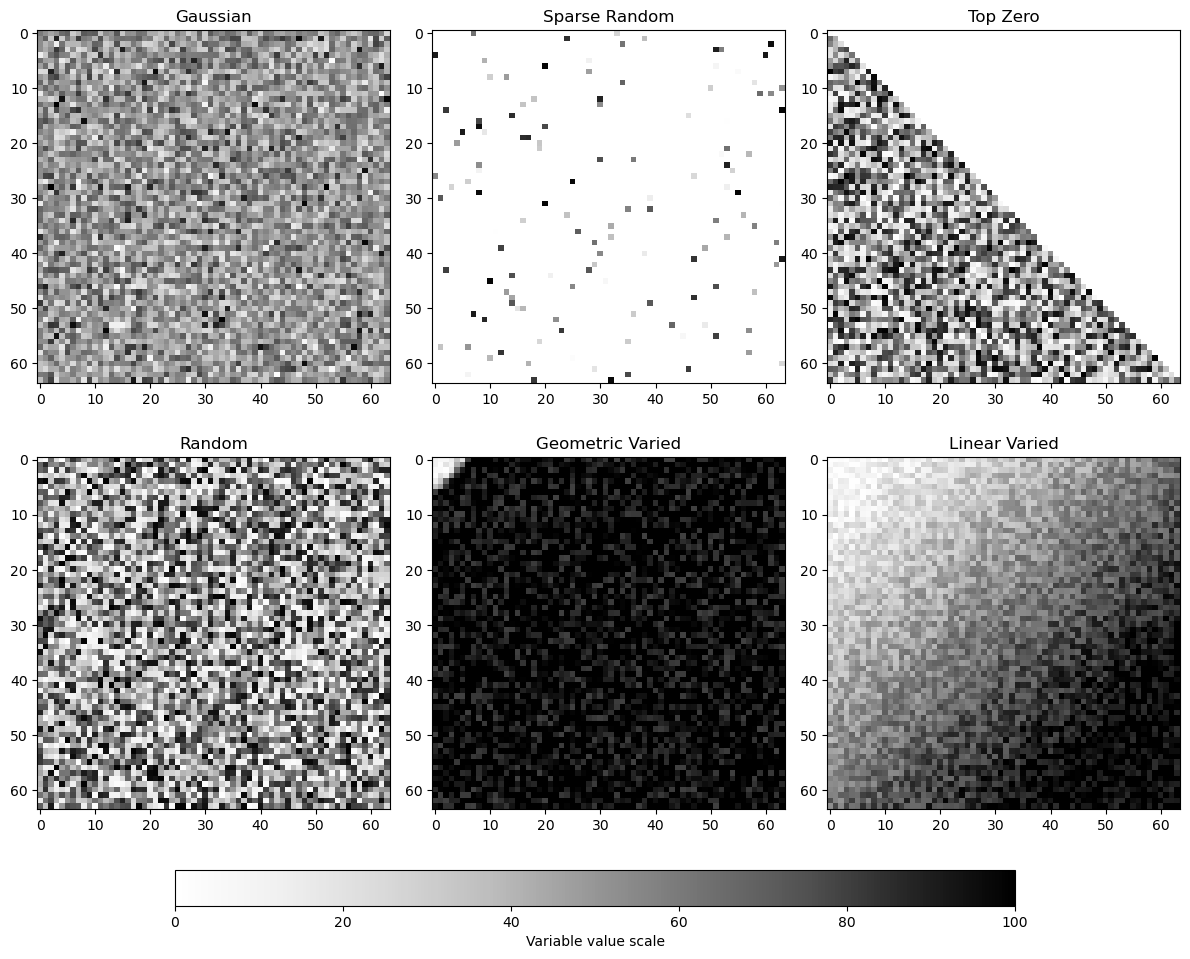

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Configuration for simplex input generation
min_value = 1
max_value = 100
size = 64  # This assumes both 'inequalities' and 'variables' should be set to 'size'
sparsity_rate = 0.97  # Example sparsity rate

# Dictionary of functions and handling conditions
input_generation_functions = {
    # 'Symmetric': generate_symmetric_simplex_input,
    'Random': generate_random_simplex_input,
    'Geometric Varied': generate_varied_geometric_simplex_input,
    'Linear Varied': generate_varied_linear_simplex_input,
    # 'Prime': generate_input_with_only_primes,
    'Gaussian': generate_gaussian_simplex_input,
    # 'Pseudoprimes': generate_pseudoprime_simplex_input,
    'Sparse Random': generate_random_simplex_input,
    'Top Zero': generate_random_simplex_input,
    'Geometric Shuffled': generate_geometric_simplex_input
}

# Setup for plot
fig, axes = plt.subplots(2, 3, figsize=(12, 18))  # Adjusted for fewer subplots
axes = axes.flatten()

# Normalize the color scale
norm = Normalize(vmin=0, vmax=max_value)

# Generate and display each matrix
for ax, (label, gen_func) in zip(axes, input_generation_functions.items()):
    try:
        if 'Sparse' in label:
            A, b, c = gen_func(size, size, min_value, max_value)
            b, c = make_sparse_simplex_input(b, c, sparsity_rate)
        elif 'Top Zero' in label:
            A, b, c = gen_func(size, size, min_value, max_value)
            b = make_diagonal_zeros(b, True)
        else:
            A, b, c = gen_func(size, size, min_value, max_value)

        # Display the data
        im = ax.imshow(b, cmap='Greys', norm=norm)
        ax.set_title(label)
    except Exception as e:
        print(f"Error with {label}: {e}")
        ax.imshow(np.zeros((size, size)), cmap='Greys')  # Show an empty grid on error
        ax.set_title(f"{label} (Error)")
        ax.axis('off')

plt.subplots_adjust()  # Adjust the height spacing
cbar_ax = fig.add_axes([0.15, 0.23, 0.7, 0.02])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Variable value scale')

plt.tight_layout(h_pad=-(size*2.6))
plt.show()